<b><font size="5">Import relevant libraries and dataframes</font><a class="anchor"><a id='toc'></a></b>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
import sompy
from sompy.sompy import SOMFactory

In [2]:
wm_cleaned = pd.read_csv(r'WineMatters_cleaned.csv')
wm_cleaned.set_index('WineID', inplace = True)
wm_cleaned.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single,Satisfaction_General
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,0,0,3,3,2,0,1,0,1,1
2,47,2464,310,305.0,4,2,0,3,0,2,...,0,0,4,3,2,1,0,0,1,1
3,15,2138,0,0.0,3,4,0,3,2,0,...,0,0,4,4,2,0,1,0,1,1
4,60,623,0,0.0,0,4,0,3,3,4,...,0,0,1,1,3,0,1,0,1,0
5,70,354,0,0.0,0,4,0,3,4,3,...,0,0,2,2,5,0,1,0,1,1


In [3]:
wm_scaled = pd.read_csv(r'WineMatters_scaled.csv')
wm_scaled.set_index('Unnamed: 0', inplace = True)
wm_scaled.index.rename('WineID', inplace=True)
wm_scaled.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single
WineID,,,,,,,,,,,,,,,,,,,,,
0,0.743590,0.034003,0.000000,0.000000,0.0,1.0,0.0,0.4,0.4,0.8,...,0.6,0.0,0.0,0.50,0.6,0.4,0.0,1.0,0.0,1.0
1,0.512821,0.381781,0.707763,0.693182,0.8,0.4,0.0,0.6,0.0,0.4,...,0.8,0.0,0.0,0.75,0.6,0.4,1.0,0.0,0.0,1.0
2,0.102564,0.330223,0.000000,0.000000,0.6,0.8,0.0,0.6,0.4,0.0,...,0.6,0.0,0.0,0.75,0.8,0.4,0.0,1.0,0.0,1.0
3,0.679487,0.090622,0.000000,0.000000,0.0,0.8,0.0,0.6,0.6,0.8,...,0.2,0.0,0.0,0.00,0.2,0.6,0.0,1.0,0.0,1.0
4,0.807692,0.048078,0.000000,0.000000,0.0,0.8,0.0,0.6,0.8,0.6,...,0.4,0.0,0.0,0.25,0.4,1.0,0.0,1.0,0.0,1.0


<b><font size="5">Segmentation of Variables after wm_scaled</font><a class="anchor"><a id='toc'></a></b>

There are two segmentation which will be used from now on using wm_scaled:
- flavor/ feeling
- production characteristics

In [4]:
# Definition of flavor/ feeling segmentation in wm_flavfeel
wm_flavfeel = wm_scaled[['Residual_Sugar', 'Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency']].copy()

In [5]:
# Definition of production characteristics segmentation in wm_prodchar
wm_prodchar = wm_scaled[['Aging_Time','Litters_Barrel','Type_White','Magnesium','Sulphites_Presence','Barrel_Wooden','Grapes_Single','Color_Intensity']].copy()

<b><font size="5">SOM - wm_flavfeel</font><a class="anchor"><a id='toc'></a></b>

In [6]:
wm_flavfeel_som = np.float32(wm_flavfeel.values)

In [7]:
rows = 25
cols = 25
mapsize = [rows, cols]

In [8]:
som_wm_flavfeel = SOMFactory().build(wm_flavfeel_som, mapsize, mask=None, 
                         mapshape='planar', 
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', 
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [9]:
# For more information about the trainig: verbose='info'
som_wm_flavfeel.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

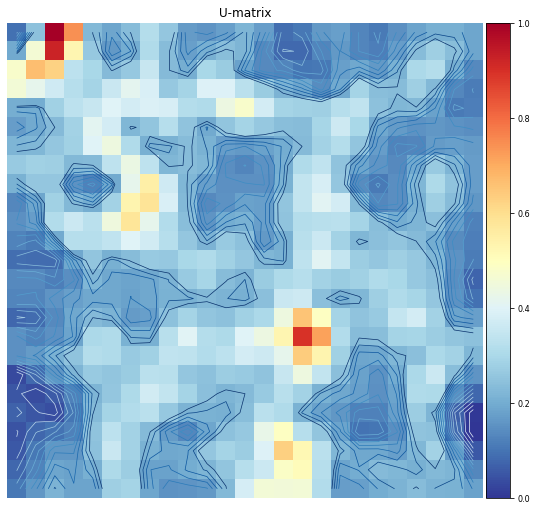

In [10]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som_wm_flavfeel, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som_wm_flavfeel, distance=1, row_normalized=True, contour=True, blob=False)

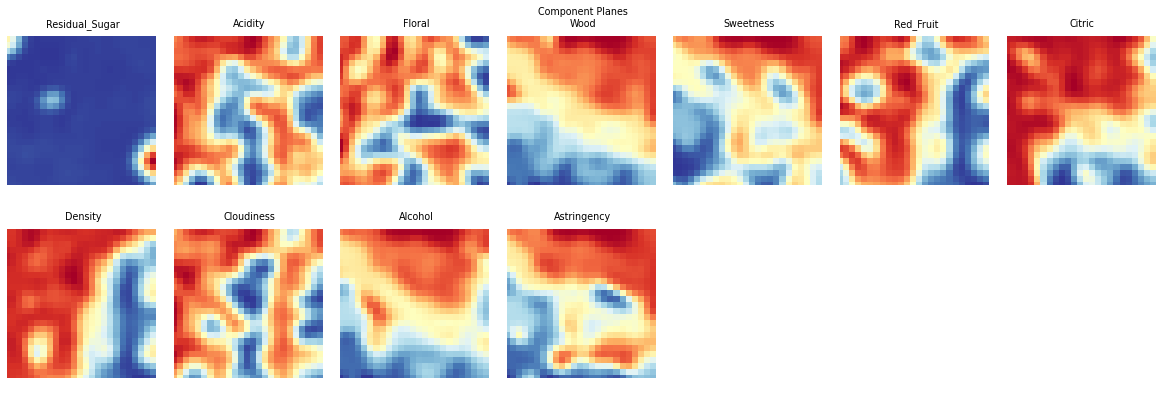

In [11]:
som_wm_flavfeel.component_names = wm_flavfeel.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)  
comp_planes.show(som_wm_flavfeel, what='codebook', which_dim='all', col_sz=7.5) #which_dim='all' default

We choose 3 clusters because we found 3 seperated dark blue zones in the U-Matrix. (look into the U-Matrix and the component planes)

In [12]:
bmus = som_wm_flavfeel.project_data(wm_flavfeel_som)
bmus

array([605, 549, 619, ..., 574, 549, 523])

In [13]:
som_wm_flavfeel.codebook.matrix

array([[ 2.889004,  0.465875,  0.6847  , ...,  0.301764,  0.802712,
         0.592834],
       [ 2.229465,  0.564971,  0.700307, ...,  0.463914,  0.910409,
         0.703095],
       [ 1.073649,  0.719405,  0.844435, ...,  0.670697,  0.954937,
         0.745934],
       ...,
       [-0.078206, -0.372739, -1.220894, ..., -0.878118, -1.080359,
        -0.811788],
       [ 0.307352, -0.473187, -1.424039, ..., -1.051888, -0.976269,
        -0.844102],
       [ 0.833747, -0.708659, -1.377899, ..., -1.144692, -0.912289,
        -0.875303]])

<b><font size="5">SOM - wm_prodchar</font><a class="anchor"><a id='toc'></a></b>

In [14]:
wm_prodchar_som = np.float32(wm_prodchar.values)

In [15]:
rows = 25
cols = 25
mapsize = [rows, cols]

In [16]:
som_wm_prodchar= SOMFactory().build(wm_prodchar_som, mapsize, mask=None, 
                         mapshape='planar', 
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', 
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [17]:
# For more information about the trainig: verbose='info'
som_wm_prodchar.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

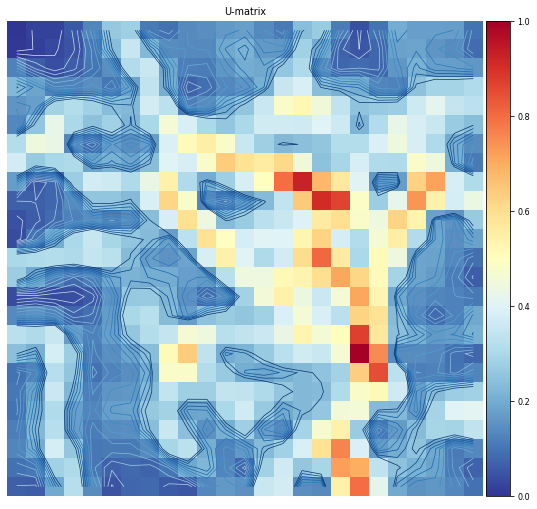

In [18]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som_wm_prodchar, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som_wm_prodchar, distance=1, row_normalized=True, contour=True, blob=False)

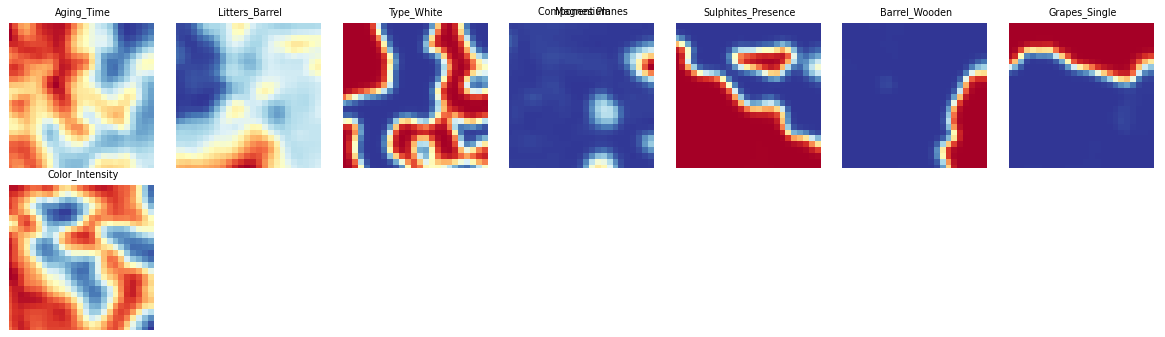

In [19]:
som_wm_prodchar.component_names = wm_prodchar.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)  
comp_planes.show(som_wm_prodchar, what='codebook', which_dim='all', col_sz=7.5) #which_dim='all' default

We choose 3 clusters because we found 3 seperated dark blue zones in the U-Matrix. (look into the U-Matrix and the component planes)

In [20]:
bmus = som_wm_prodchar.project_data(wm_prodchar_som)
bmus

array([ 78, 199, 219, ..., 149, 174, 198])

In [21]:
som_wm_prodchar.codebook.matrix

array([[ 1.440165, -1.362514,  0.9852  , ..., -0.473659,  1.495484,
         1.021633],
       [ 1.082315, -1.369964,  0.9852  , ..., -0.473656,  1.495484,
         1.021446],
       [ 0.698416, -1.315392,  0.985195, ..., -0.473569,  1.495484,
         0.919832],
       ...,
       [-0.341803,  0.005339, -0.689431, ...,  2.111222, -0.664567,
        -1.078453],
       [-0.467923,  0.070779, -0.334396, ...,  2.111224, -0.663585,
        -1.466877],
       [-0.539734,  0.146555, -0.055076, ...,  2.111224, -0.663408,
        -1.744468]])

<b><font size="5">Clusters with SOM- Option 1</font><a class="anchor"><a id='toc'></a></b>

<b><font size="5">wm_flavfeel </font><a class="anchor"><a id='toc'></a></b>

In [22]:
#first you can do clustering. Currently only K-means on top of the trained som
cl = som_wm_flavfeel.cluster(n_clusters=3)

In [23]:
labels = getattr(som_wm_flavfeel, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,

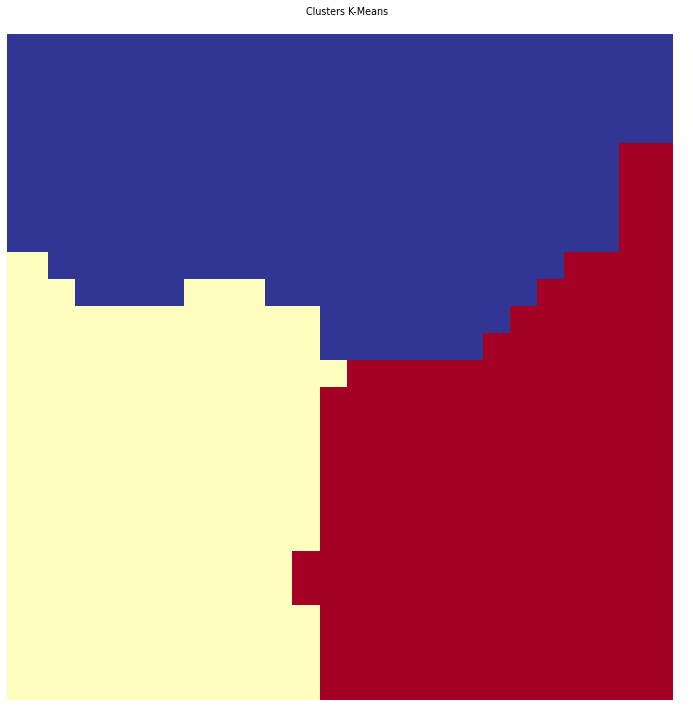

In [24]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som_wm_flavfeel, what='cluster')

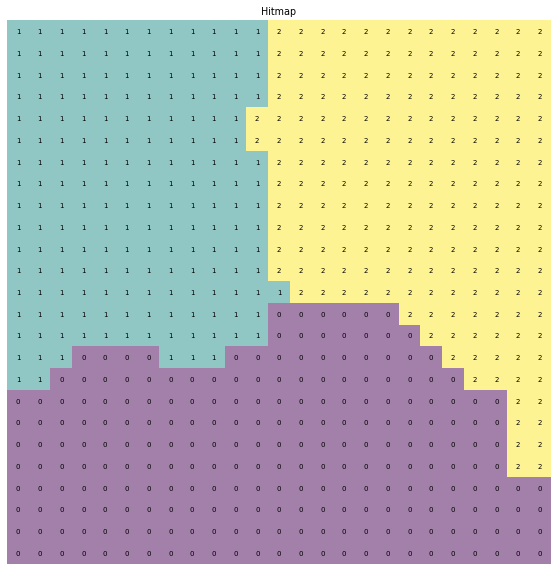

In [25]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som_wm_flavfeel)

In [26]:
bmus = som_wm_flavfeel.project_data(wm_flavfeel_som)
wm_flavfeel['bmu'] = bmus

In [27]:
wm_flavfeel['label'] = labels[wm_flavfeel['bmu']]

In [28]:
wm_flavfeel.head()

,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,Density,Cloudiness,Alcohol,Astringency,bmu,label
WineID,,,,,,,,,,,,,
0,0.000000,0.0,1.0,0.0,0.4,0.4,0.8,0.4,0.6,0.0,0.0,605,1
1,0.693182,0.8,0.4,0.0,0.6,0.0,0.4,0.4,0.8,0.0,0.0,549,2
2,0.000000,0.6,0.8,0.0,0.6,0.4,0.0,0.4,0.6,0.0,0.0,619,2
3,0.000000,0.0,0.8,0.0,0.6,0.6,0.8,0.6,0.2,0.0,0.0,605,1
4,0.000000,0.0,0.8,0.0,0.6,0.8,0.6,0.8,0.4,0.0,0.0,605,1


In [29]:
df_final_flavfeel = wm_cleaned.copy(deep=True)
df_final_flavfeel['label_c'] = wm_flavfeel['label']

In [30]:
df_final_flavfeel.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single,Satisfaction_General,label_c
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,0,3,3,2,0,1,0,1,1,2.0
2,47,2464,310,305.0,4,2,0,3,0,2,...,0,4,3,2,1,0,0,1,1,2.0
3,15,2138,0,0.0,3,4,0,3,2,0,...,0,4,4,2,0,1,0,1,1,1.0
4,60,623,0,0.0,0,4,0,3,3,4,...,0,1,1,3,0,1,0,1,0,1.0
5,70,354,0,0.0,0,4,0,3,4,3,...,0,2,2,5,0,1,0,1,1,2.0


<b><font size="5">wm_prodchar </font><a class="anchor"><a id='toc'></a></b>

In [31]:
cl = som_wm_prodchar.cluster(n_clusters=3)

In [32]:
labels = getattr(som_wm_prodchar, 'cluster_labels')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

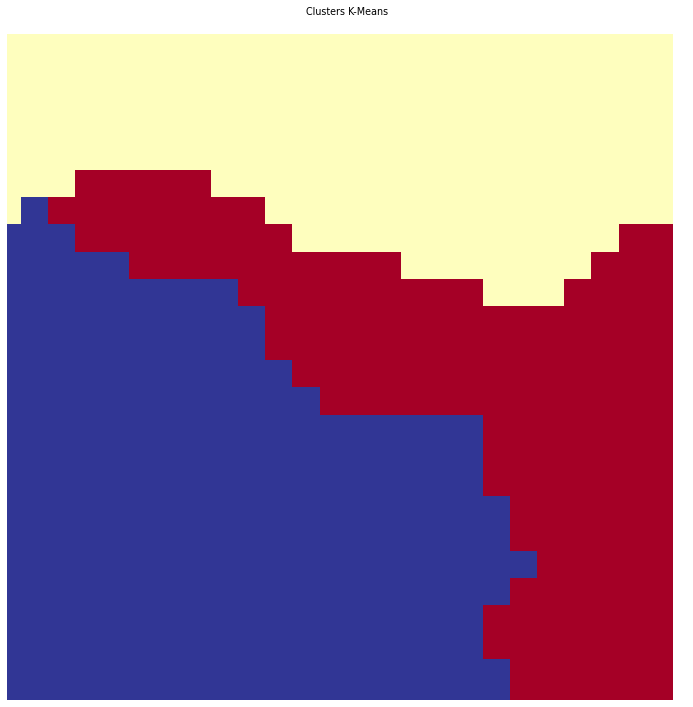

In [33]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som_wm_prodchar, what='cluster')

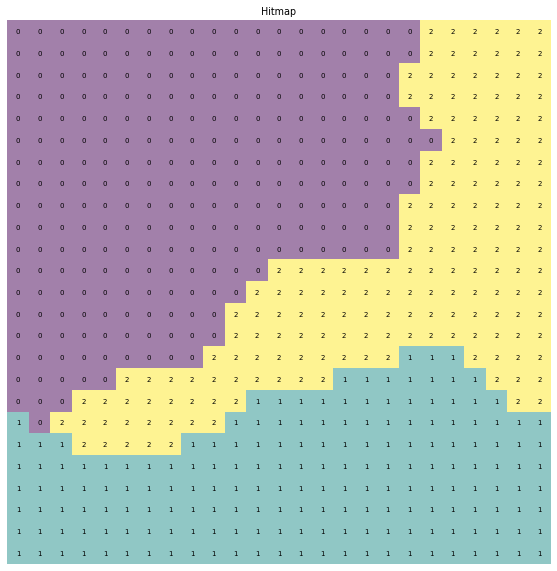

In [34]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som_wm_prodchar)

In [35]:
bmus = som_wm_prodchar.project_data(wm_prodchar_som)
wm_prodchar['bmu'] = bmus

In [36]:
wm_prodchar['label'] = labels[wm_prodchar['bmu']]

In [37]:
wm_prodchar.head()

,Aging_Time,Litters_Barrel,Type_White,Magnesium,Sulphites_Presence,Barrel_Wooden,Grapes_Single,Color_Intensity,bmu,label
WineID,,,,,,,,,,
0,0.743590,0.034003,1.0,0.000000,0.0,0.0,1.0,0.6,78,1
1,0.512821,0.381781,0.0,0.707763,1.0,0.0,1.0,0.6,199,2
2,0.102564,0.330223,1.0,0.000000,0.0,0.0,1.0,0.4,219,1
3,0.679487,0.090622,1.0,0.000000,0.0,0.0,1.0,0.2,81,1
4,0.807692,0.048078,1.0,0.000000,0.0,0.0,1.0,0.4,80,1


In [38]:
df_final_prodchar = df_final_flavfeel.copy(deep=True)
df_final_prodchar['label_b'] = wm_prodchar['label']

In [39]:
df_final_prodchar.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single,Satisfaction_General,label_c,label_b
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,3,3,2,0,1,0,1,1,2.0,2.0
2,47,2464,310,305.0,4,2,0,3,0,2,...,4,3,2,1,0,0,1,1,2.0,1.0
3,15,2138,0,0.0,3,4,0,3,2,0,...,4,4,2,0,1,0,1,1,1.0,1.0
4,60,623,0,0.0,0,4,0,3,3,4,...,1,1,3,0,1,0,1,0,1.0,1.0
5,70,354,0,0.0,0,4,0,3,4,3,...,2,2,5,0,1,0,1,1,2.0,1.0


In [40]:
descr_together = df_final_prodchar.reset_index(drop=True)
descr_together = descr_together.groupby(['label_c','label_b'])[['Residual_Sugar', 'Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency','Aging_Time','Litters_Barrel','Type_White','Magnesium','Sulphites_Presence','Barrel_Wooden','Grapes_Single','Color_Intensity']].describe().T
descr_together

label_c                         0.0                                      1.0  \
label_b                         0.0           1.0          2.0           0.0   
Residual_Sugar  count  22785.000000  16004.000000  9472.000000  18511.000000   
                mean      13.540531     14.094226    14.348079     14.042839   
                std       33.993697     34.379476    36.364378     34.999444   
                min        0.000000      0.000000     0.000000      0.000000   
                25%        0.000000      0.000000     0.000000      0.000000   
...                             ...           ...          ...           ...   
Color_Intensity min        0.000000      1.000000     1.000000      0.000000   
                25%        4.000000      2.000000     3.000000      4.000000   
                50%        4.000000      4.000000     4.000000      4.000000   
                75%        5.000000      5.000000     5.000000      5.000000   
                max        5.000000      5.000000     5.000000      5.000000   

label_c                                                    2.0                \
label_b                         1.0          2.0           0.0           1.0   
Residual_Sugar  count  10230.000000  8857.000000  12452.000000  13364.000000   
                mean      14.661779    15.117083     16.931658     14.827821   
                std       34.546988    36.158519     36.584745     35.258550   
                min        0.000000     0.000000      0.000000      0.000000   
                25%        0.000000     0.000000      0.000000      0.000000   
...                             ...          ...           ...           ...   
Color_Intensity min        1.000000     1.000000      0.000000      1.000000   
                25%        2.000000     2.000000      2.000000      2.000000   
                50%        4.000000     4.000000      2.000000      4.000000   
                75%        5.000000     4.000000      3.000000      5.000000   
                max        5.000000     5.000000      5.000000      5.000000   

label_c                              
label_b                         2.0  
Residual_Sugar  count  17066.000000  
                mean      16.329193  
                std       37.292636  
                min        0.000000  
                25%        0.000000  
...                             ...  
Color_Intensity min        0.000000  
                25%        2.000000  
                50%        3.000000  
                75%        4.000000  
                max        5.000000  

[152 rows x 9 columns]

In [60]:
#It is to compare the 2 labels
descr_final = df_final_prodchar.reset_index(drop=True)
descr_final = descr_final.groupby(['label_c', 'label_b'])[['Residual_Sugar', 'Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency','Aging_Time','Litters_Barrel','Type_White','Magnesium','Sulphites_Presence','Barrel_Wooden','Grapes_Single','Color_Intensity']].agg(['mean','max', 'min'])
descr_final

Residual_Sugar               Acidity            Floral      \
                          mean    max  min      mean max min      mean max   
label_c label_b                                                              
0.0     0.0          13.540531  436.0  0.0  3.939214   5   1  3.512311   5   
        1.0          14.094226  432.0  0.0  3.575731   5   0  3.464446   5   
        2.0          14.348079  438.0  0.0  3.530933   5   1  3.475084   5   
1.0     0.0          14.042839  438.0  0.0  3.767165   5   0  3.462266   5   
        1.0          14.661779  417.0  0.0  3.475269   5   0  3.476540   5   
        2.0          15.117083  425.0  0.0  3.366941   5   1  3.266682   5   
2.0     0.0          16.931658  435.0  0.0  2.766222   5   0  2.869579   5   
        1.0          14.827821  440.0  0.0  3.472987   5   0  3.410431   5   
        2.0          16.329193  424.0  0.0  3.050510   5   0  3.029005   5   

                         Wood  ... Sulphites_Presence Barrel_Wooden          \
                min      mean  ...                min          mean max min   
label_c label_b                ...                                            
0.0     0.0       1  3.072943  ...                  0      0.003599   1   0   
        1.0       1  3.203012  ...                  0      0.000000   0   0   
        2.0       1  3.669024  ...                  0      0.634185   1   0   
1.0     0.0       1  2.815785  ...                  0      0.016963   1   0   
        1.0       1  2.336657  ...                  0      0.000000   0   0   
        2.0       1  2.247036  ...                  0      0.670656   1   0   
2.0     0.0       0  2.914793  ...                  0      0.010440   1   0   
        1.0       1  2.603038  ...                  0      0.000000   0   0   
        2.0       1  2.593051  ...                  0      0.645904   1   0   

                Grapes_Single         Color_Intensity          
                         mean max min            mean max min  
label_c label_b                                                
0.0     0.0          0.000658   1   0        4.195128   5   0  
        1.0          0.997438   1   0        3.426456   5   1  
        2.0          0.000000   0   0        3.497255   5   1  
1.0     0.0          0.000432   1   0        3.955270   5   0  
        1.0          0.998240   1   0        3.450440   5   1  
        2.0          0.013323   1   0        3.324715   5   1  
2.0     0.0          0.001606   1   0        2.488677   5   0  
        1.0          0.990422   1   0        3.409159   5   1  
        2.0          0.010430   1   0        2.843842   5   0  

[9 rows x 57 columns]

<b><font size="5">Clusters with SOM- Option 2</font><a class="anchor"><a id='toc'></a></b>

<b><font size="5">wm_flavfeel </font><a class="anchor"><a id='toc'></a></b>

In [41]:
rows = 2
cols = 2
mapsize = [rows, cols]

In [42]:
# this will use the default parameters, but you can change the initialization and neighborhood methods
som2_wm_flavfeel = SOMFactory().build(wm_flavfeel_som, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [59]:
# For more information about the trainig: verbose='info'
som2_wm_flavfeel.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

In [45]:
bmus2_wm_flavfeel = som2_wm_flavfeel.project_data(wm_flavfeel_som)
bmus2_wm_flavfeel

array([3, 3, 3, ..., 3, 3, 1])

In [46]:
som2_wm_flavfeel.codebook.matrix

array([[-0.021386,  0.114624,  0.113675,  0.228326,  0.144604,  0.135767,
         0.233562,  0.186802,  0.121797,  0.247146,  0.162728],
       [ 0.004752, -0.06011 , -0.076997,  0.134226,  0.134425, -0.091338,
        -0.04699 , -0.129618, -0.071479,  0.087877,  0.122714],
       [-0.006171,  0.062241,  0.075727, -0.136936, -0.151265,  0.088609,
         0.061449,  0.127216,  0.073347, -0.102711, -0.13345 ],
       [ 0.023761, -0.123112, -0.119323, -0.229028, -0.128055, -0.141269,
        -0.258286, -0.195876, -0.130693, -0.238027, -0.153398]])

In [57]:
wm_flavfeel['label_2c'] = bmus2_wm_flavfeel
wm_flavfeel.head()

,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,Density,Cloudiness,Alcohol,Astringency,bmu,label,label_2c
WineID,,,,,,,,,,,,,,
0,0.000000,0.0,1.0,0.0,0.4,0.4,0.8,0.4,0.6,0.0,0.0,605,1,3
1,0.693182,0.8,0.4,0.0,0.6,0.0,0.4,0.4,0.8,0.0,0.0,549,2,3
2,0.000000,0.6,0.8,0.0,0.6,0.4,0.0,0.4,0.6,0.0,0.0,619,2,3
3,0.000000,0.0,0.8,0.0,0.6,0.6,0.8,0.6,0.2,0.0,0.0,605,1,3
4,0.000000,0.0,0.8,0.0,0.6,0.8,0.6,0.8,0.4,0.0,0.0,605,1,3


In [48]:
descr2_wm_flavfeel = wm_flavfeel.reset_index(drop=True)
descr2_wm_flavfeel= descr2_wm_flavfeel.groupby(['label_2c'])[['Residual_Sugar', 'Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency']].describe().T
descr2_wm_flavfeel

label_2c                         0             1             2             3
Residual_Sugar count  43458.000000  21480.000000  25947.000000  38425.000000
               mean       0.028672      0.034964      0.030154      0.040524
               std        0.072877      0.081503      0.074915      0.090420
               min        0.000000      0.000000      0.000000      0.000000
               25%        0.000000      0.000000      0.000000      0.000000
...                            ...           ...           ...           ...
Astringency    min        0.000000      0.000000      0.000000      0.000000
               25%        0.600000      0.600000      0.200000      0.200000
               50%        0.800000      0.800000      0.400000      0.400000
               75%        1.000000      1.000000      0.400000      0.600000
               max        1.000000      1.000000      1.000000      1.000000

[88 rows x 4 columns]

<b><font size="5">wm_prodchar </font><a class="anchor"><a id='toc'></a></b>

In [49]:
rows = 2
cols = 2
mapsize = [rows, cols]

In [50]:
# this will use the default parameters, but you can change the initialization and neighborhood methods
som2_wm_prodchar = SOMFactory().build(wm_prodchar_som, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [51]:
# For more information about the trainig: verbose='info'
som2_wm_prodchar.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

In [52]:
bmus2_wm_prodchar = som2_wm_prodchar.project_data(wm_prodchar_som)
bmus2_wm_prodchar

array([0, 1, 1, ..., 1, 1, 1])

In [53]:
som2_wm_prodchar.codebook.matrix

array([[ 0.170964, -0.112264,  0.013955, -0.01764 , -0.081069, -0.188074,
         0.139968,  0.052096],
       [-0.165733,  0.02235 , -0.020532,  0.018376, -0.262749, -0.001645,
         0.274365, -0.080509],
       [ 0.143497, -0.012694,  0.009978, -0.017297,  0.25777 , -0.059359,
        -0.233306,  0.082813],
       [-0.159662,  0.098458, -0.004702,  0.017935,  0.046269,  0.241579,
        -0.138444, -0.062323]])

In [54]:
wm_prodchar['label_2b'] = bmus2_wm_prodchar

In [55]:
descr2_wm_prodchar = wm_prodchar.reset_index(drop=True)
descr2_wm_prodchar= descr2_wm_prodchar.groupby(['label_2b','label_2c'])[['Residual_Sugar', 'Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency','Aging_Time','Litters_Barrel','Type_White','Magnesium','Sulphites_Presence','Barrel_Wooden','Grapes_Single','Color_Intensity']].describe().T
descr2_wm_prodchar

KeyError: 'label_2c'

So we decided to use this algorithm because it is the one who devides the clusters more equaly.